CHURN PREDICTION IN TELECOM INDUSTRY USING LOGISTIC ALGORITHM

Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
Telecom_Customer = pd.read_csv("WA_Fn-UseC_-Teleco-Customer-Churn.csv")

In [4]:
Telecom_Customer.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
Telecom_Customer.shape

(7043, 21)

In [6]:
Telecom_Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
Telecom_Customer.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

 DATA TYPES OF ALL THE COLUMNS

In [110]:
Telecom_Customer.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

CONVERTING TOTAL CHARGES TO NUMERICAL DATA TYPES

In [111]:
Telecom_Customer.TotalCharges = pd.to_numeric(Telecom_Customer.TotalCharges, errors='coerce')
Telecom_Customer.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

REMOVING MISSING VALUES

In [112]:
Telecom_Customer.dropna(inplace = True)

 REMOVE CUSTOMER IDs FROM THE DATASET

In [11]:
df2 = Telecom_Customer.iloc[:,1:]

CONVERTING PREDICTOR VARIABLE INTO A BINARY VARIABLE

In [13]:
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
     

CONVERTING ALL CATEGORIAL VARIABLES INTO DUMMY VARIABLES

In [14]:
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


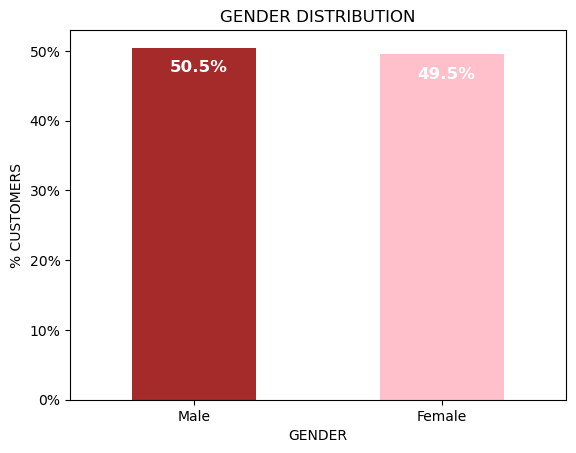

In [24]:
Colors = ['brown','pink']
ax = (Telecom_Customer['gender'].value_counts()*100.0 /len(Telecom_Customer)).plot(kind='bar',stacked = True,rot = 0,color = Colors)
                                                                             
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('GENDER')
ax.set_ylabel('% CUSTOMERS')
ax.set_title('GENDER DISTRIBUTION')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')
     

In [ ]:
GETTING CORRELATION OF "CHURN" WITH OTHER VARIABLES.

<Axes: >

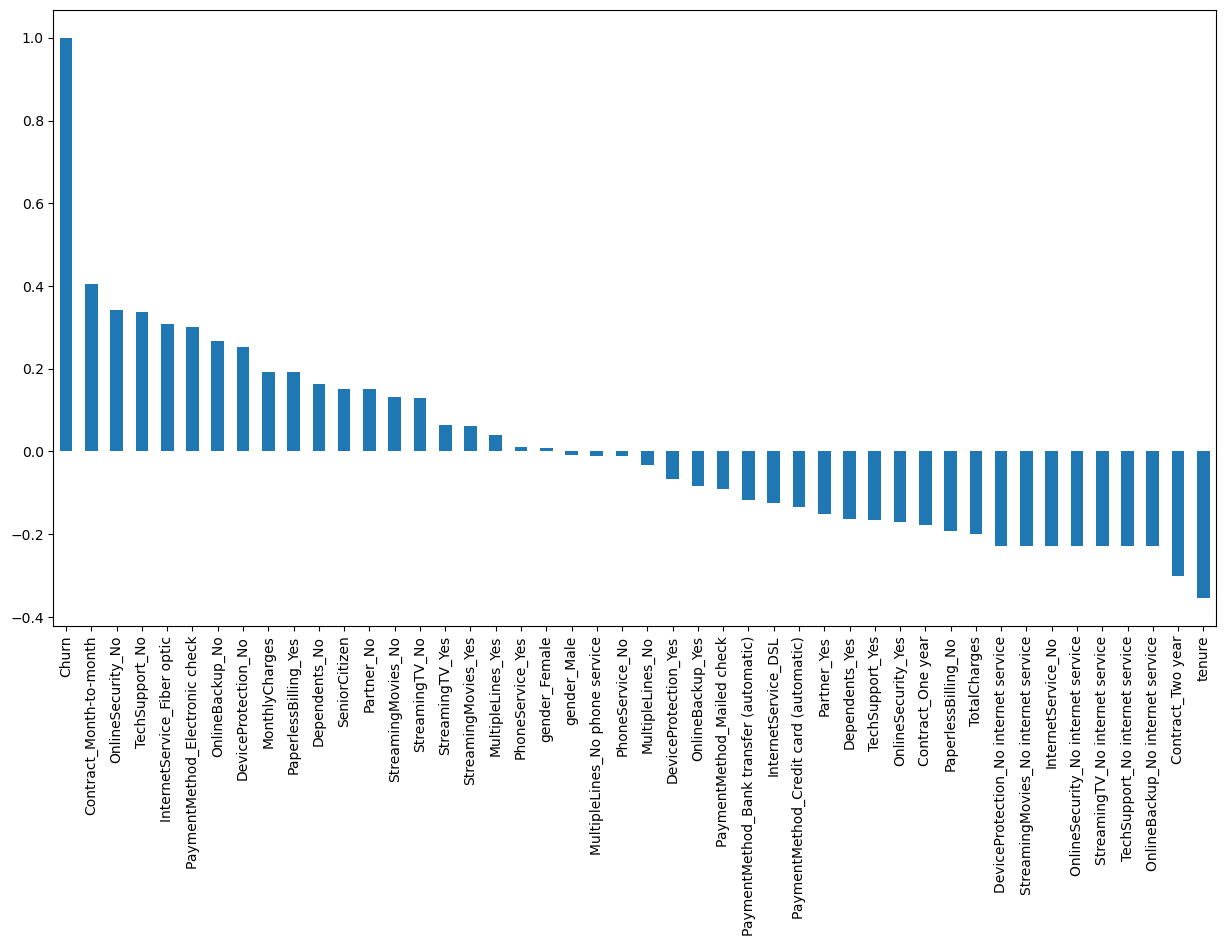

In [31]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Text(0.5, 1.0, 'SENIOR CITIZENS PERCENTILE')

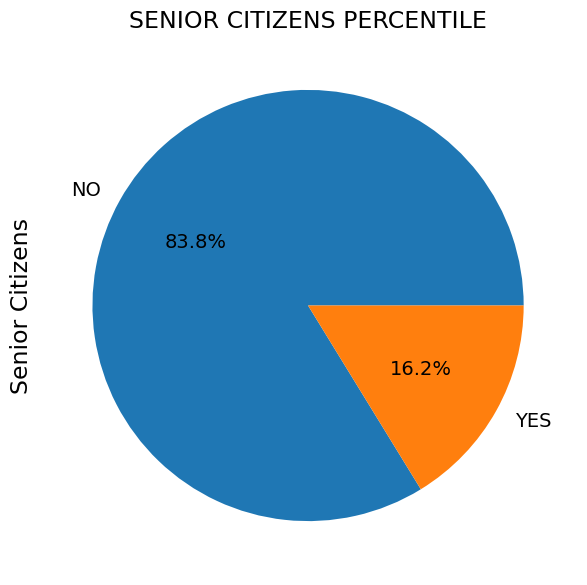

In [32]:
ax = (Telecom_Customer['SeniorCitizen'].value_counts()*100.0 /len(Telecom_Customer))\
.plot.pie(autopct='%.1f%%', labels = ['NO', 'YES'],figsize =(7,7), fontsize = 14 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 17)
ax.set_title('SENIOR CITIZENS PERCENTILE', fontsize = 17)

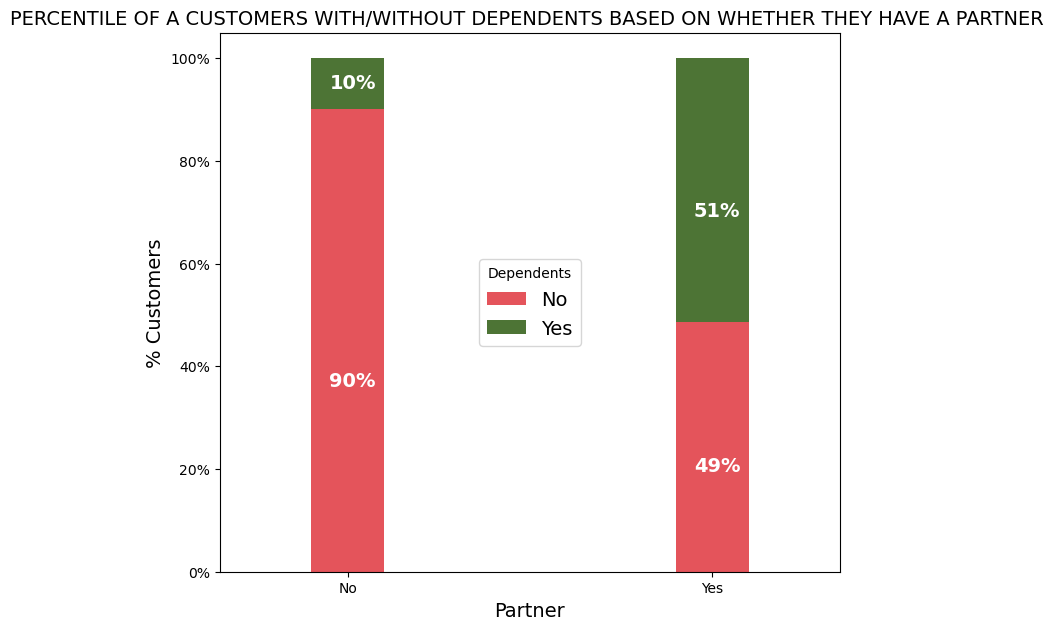

In [36]:
Colors = ['#E4545B','#4D7435']
partner_dependents = Telecom_Customer.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar', width = 0.2, stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,7),
                                                                color = Colors)
                                                               
                                                               
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('PERCENTILE OF A CUSTOMERS WITH/WITHOUT DEPENDENTS BASED ON WHETHER THEY HAVE A PARTNER ',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

C:\Users\gsnlm\AppData\Local\Temp\ipykernel_25280\2426995769.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Telecom_Customer['tenure'], hist=True, kde=False,


Text(0.5, 1.0, 'PERCENTAGE OF CUSTOMERS BY THEIR TENURE')

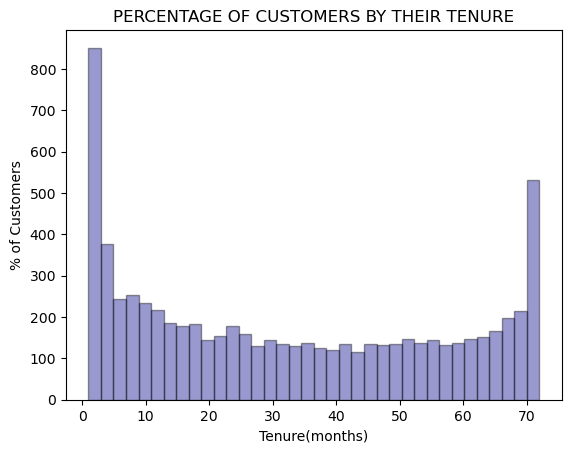

In [48]:
ax = sns.distplot(Telecom_Customer['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('% of Customers')
ax.set_xlabel('Tenure(months)')
ax.set_title('PERCENTAGE OF CUSTOMERS BY THEIR TENURE')

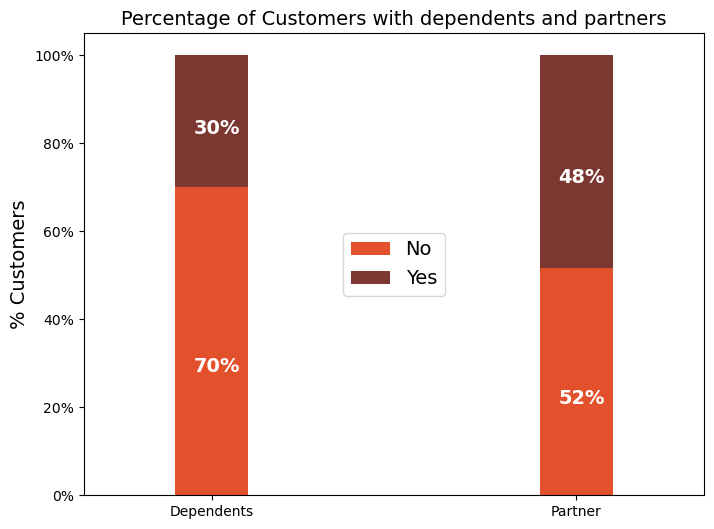

In [47]:
df2 = pd.melt(Telecom_Customer, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(Telecom_Customer)
colors = ['#E3512C','#7D3731']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('Percentage of Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Text(0.5, 1.0, 'PERCENTAGE OF CUSTOMERS BY CONTRACT TYPE')

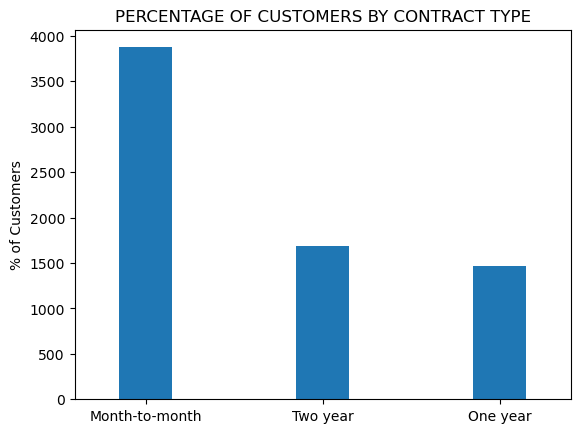

In [50]:
ax = Telecom_Customer['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('% of Customers')
ax.set_title('PERCENTAGE OF CUSTOMERS BY CONTRACT TYPE')

C:\Users\gsnlm\AppData\Local\Temp\ipykernel_25280\3268513577.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Telecom_Customer[Telecom_Customer['Contract']=='Month-to-month']['tenure'],
C:\Users\gsnlm\AppData\Local\Temp\ipykernel_25280\3268513577.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a

Text(0.5, 1.0, 'Two Year Contract')

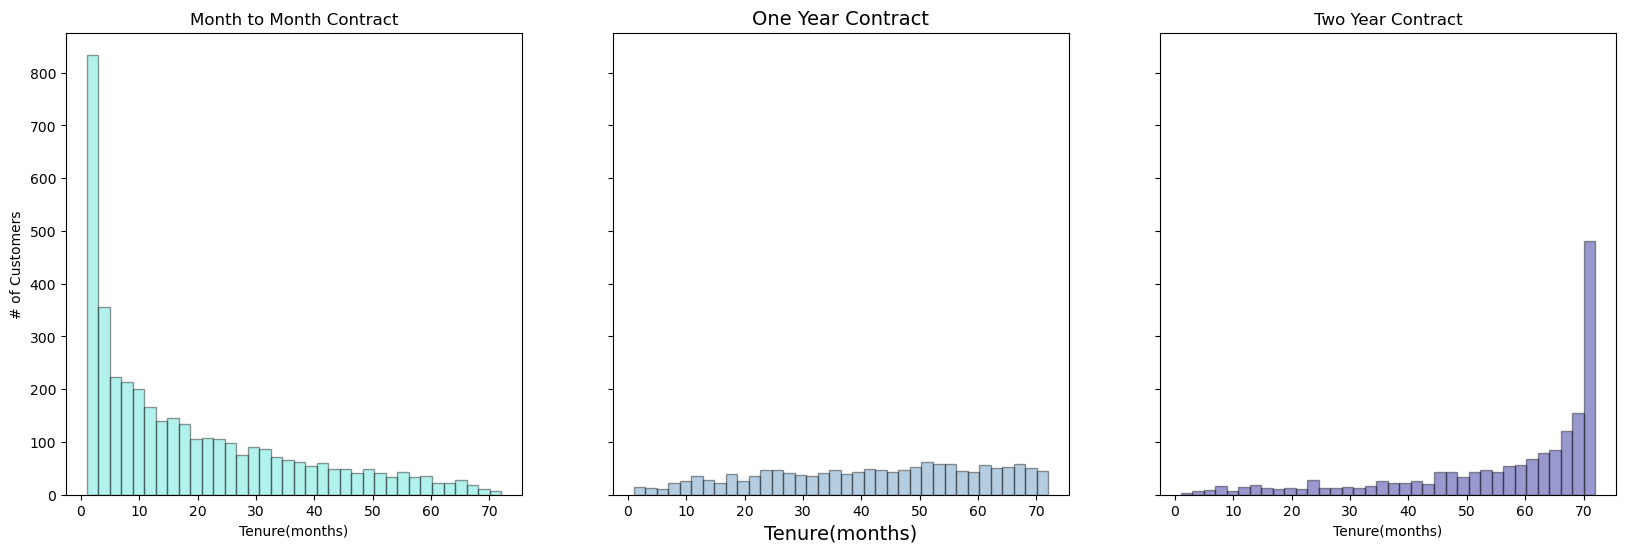

In [93]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(Telecom_Customer[Telecom_Customer['Contract']=='Month-to-month']['tenure'],
                    hist = True,kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure(months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(Telecom_Customer[Telecom_Customer['Contract']=='One year']['tenure'],
                   hist = True,kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure(months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(Telecom_Customer[Telecom_Customer['Contract']=='Two year']['tenure'],
                    hist = True,kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure(months)')
ax.set_title('Two Year Contract')

Now let us look at the distribution of various services used by customers

In [54]:
Telecom_Customer.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

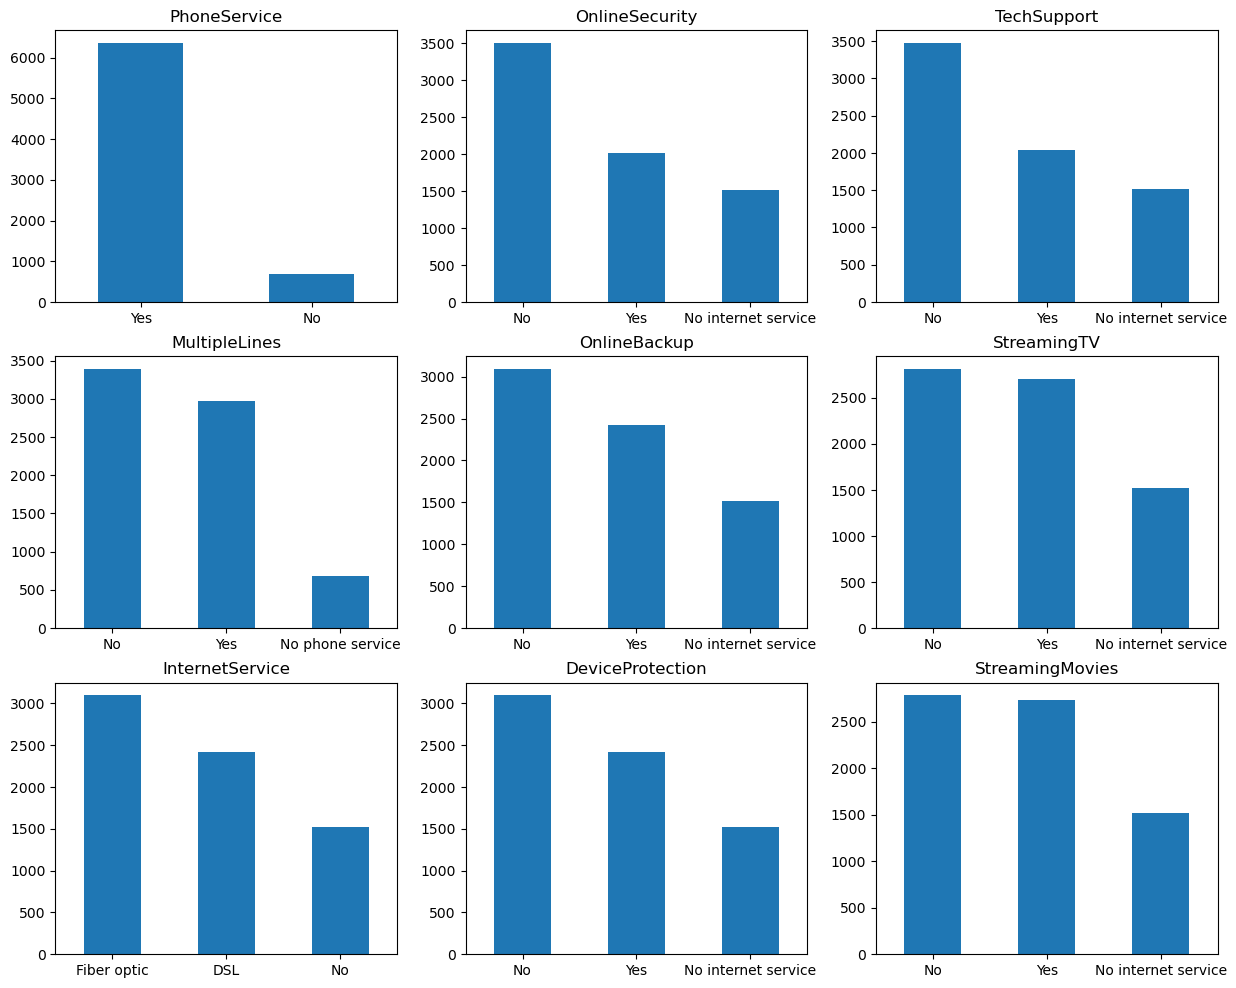

In [57]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = Telecom_Customer[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = Telecom_Customer[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = Telecom_Customer[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)
     

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

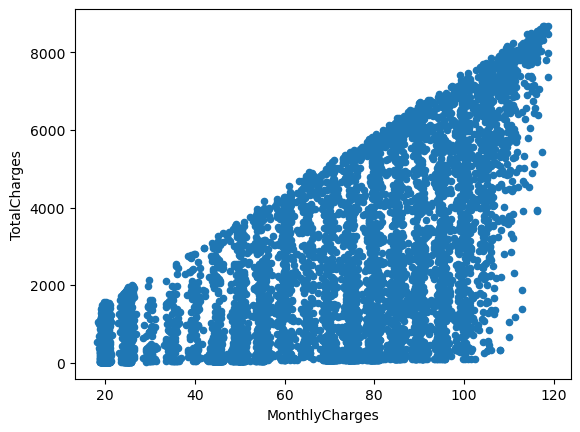

In [58]:
Telecom_Customer[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

Looking at out predictor variable (Churn) and understand its interaction with other important variables as we have found out in the correlation plot.

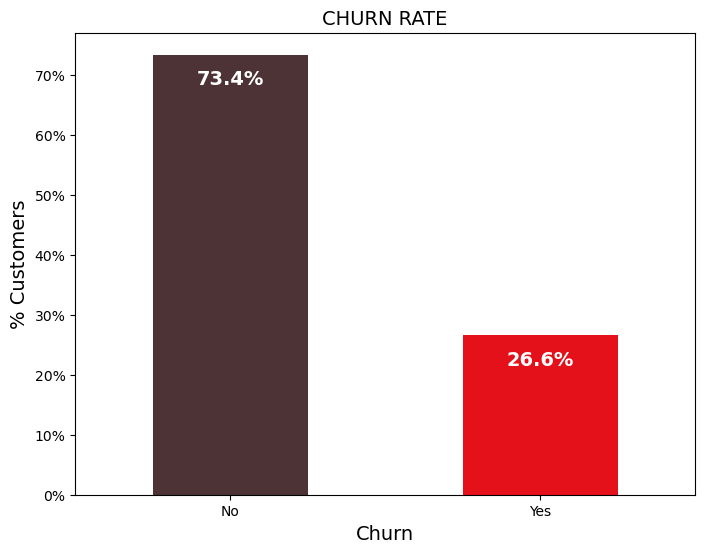

In [72]:
Colors = ['#4D3335', '#E4111B']
ax = (Telecom_Customer['Churn'].value_counts() * 100.0 / len(Telecom_Customer)).plot(kind='bar',
                                                                                    stacked=True,
                                                                                    rot=0,
                                                                                    color=Colors,
                                                                                    figsize=(8, 6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('CHURN RATE', size=14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using the above list
total = sum(totals)

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() - 4.0,
            str(round((i.get_height() / total) * 100, 1)) + '%',
            color='white',
            weight='bold',
            ha='center',
            va='center',
            size=14)

plt.show()

Churn vs Tenure

<Axes: xlabel='Churn', ylabel='tenure'>

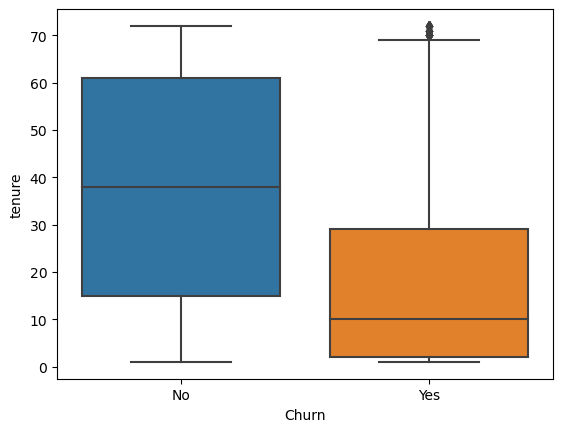

In [73]:
sns.boxplot(x = Telecom_Customer.Churn, y = Telecom_Customer.tenure)

Churn by Contract Type

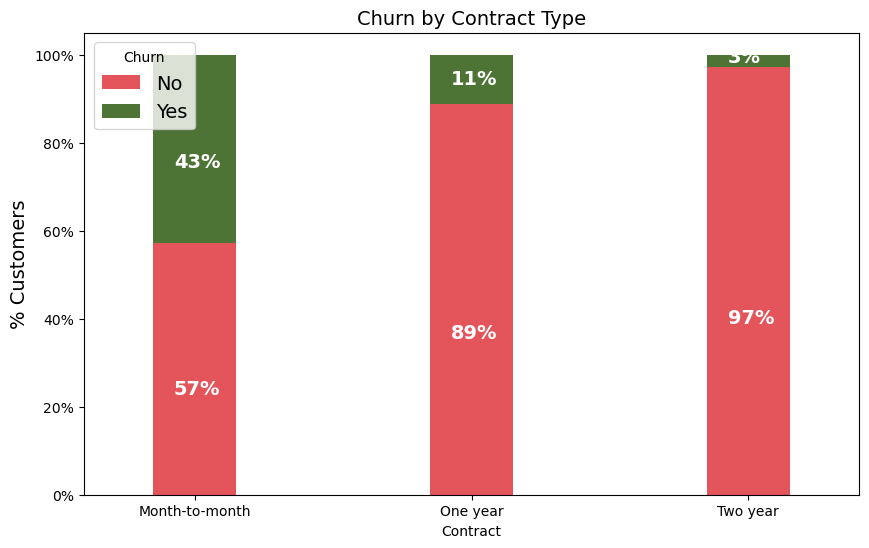

In [75]:
Colors = ['#E4545B','#4D7435']
contract_churn = Telecom_Customer.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = Colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Churn by Seniority

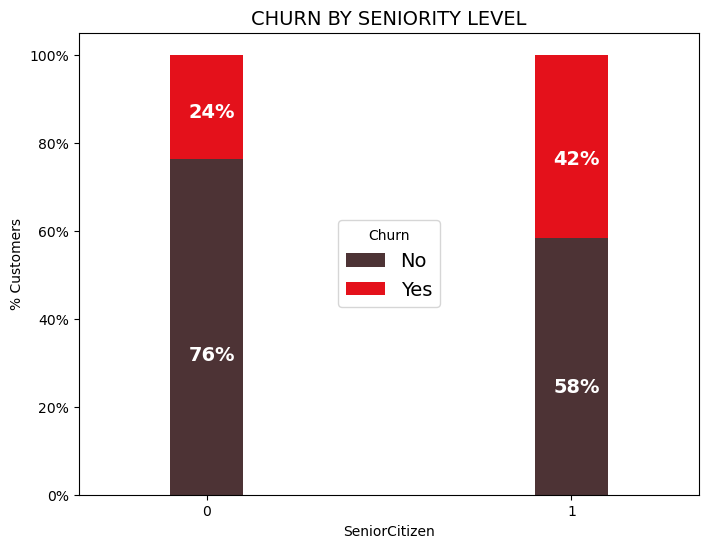

In [78]:
Colors = ['#4D3335','#E4111B']
seniority_churn = Telecom_Customer.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = Colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('CHURN BY SENIORITY LEVEL',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)


Churn by Monthly Charges

Text(0.5, 1.0, 'DISTRIBUTION OF MONTHLY CHARGES BY CHURN')

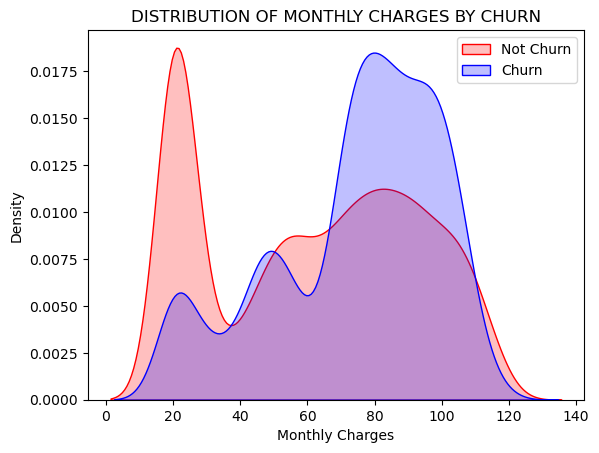

In [81]:
ax = sns.kdeplot(Telecom_Customer.MonthlyCharges[(Telecom_Customer["Churn"] == 'No') ],
                color="Red", fill = True)
ax = sns.kdeplot(Telecom_Customer.MonthlyCharges[(Telecom_Customer["Churn"] == 'Yes') ],
                ax =ax, color="Blue", fill = True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('DISTRIBUTION OF MONTHLY CHARGES BY CHURN')


Churn by Total Charges

Text(0.5, 1.0, 'DISTRIBUTION OF TOTAL CHARGES BY CHURN')

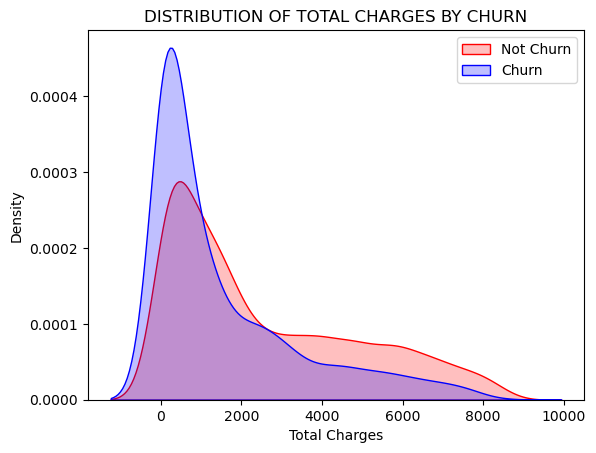

In [83]:
ax = sns.kdeplot(Telecom_Customer.TotalCharges[(Telecom_Customer["Churn"] == 'No') ],
                color="Red", fill = True)
ax = sns.kdeplot(Telecom_Customer.TotalCharges[(Telecom_Customer["Churn"] == 'Yes') ],
                ax =ax, color="Blue", fill = True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('DISTRIBUTION OF TOTAL CHARGES BY CHURN')

Support Vecor Machine (SVM)

In [85]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99) 

Accuracy

In [88]:
from sklearn.svm import SVC
from sklearn import metrics
model = SVC()
result = model.fit(X_train, y_train)

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.820184790334044

Confusion-Matrix

In [89]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds)) 

[[953  89]
 [164 201]]


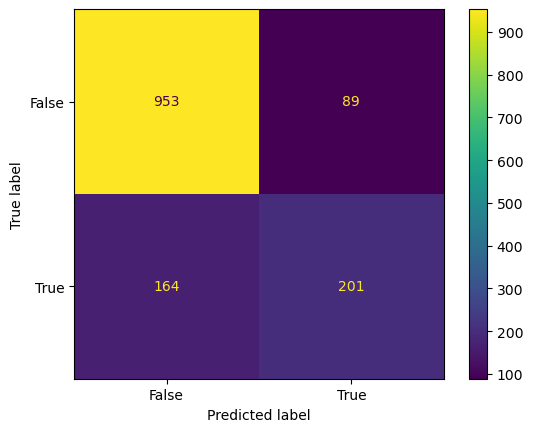

In [90]:
confusion_matrix = metrics.confusion_matrix(y_test,preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

With the help of Support Vecor Machine (SVM) I was able to get the accuracy to upto 82%.

THANK YOU!